<a href="https://colab.research.google.com/github/reidnclark/volatility-forecast/blob/main/Lab10_ReidC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
##**Lab 10, Reid C.**
##**Question 11.4 (a):**
##### Note: I manually prepared gains and lift charts prior to it was confirmed absent.

Training data (5)
Classification Report:

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93      2582
         1.0       0.63      0.06      0.11       409

    accuracy                           0.87      2991
   macro avg       0.75      0.53      0.52      2991
weighted avg       0.84      0.87      0.82      2991


Confusion Matrix:
[[2568   14]
 [ 385   24]]

Validation data (5)
Classification Report:

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      1748
         1.0       0.36      0.03      0.06       246

    accuracy                           0.87      1994
   macro avg       0.62      0.51      0.50      1994
weighted avg       0.82      0.87      0.82      1994


Confusion Matrix:
[[1734   14]
 [ 238    8]]


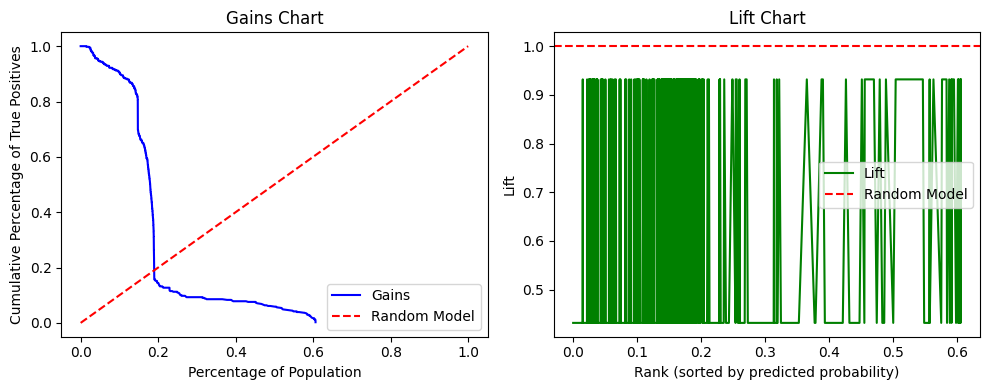

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

df = pd.read_csv('airlines_df_clean.csv')

X_df = df.drop(columns=['Phone_sale'])  # Assuming 'Phone_sale' is the target column
Y_df = df['Phone_sale']

scaleInput = MinMaxScaler()
scaleOutput = MinMaxScaler()

X = scaleInput.fit_transform(X_df)
y = scaleOutput.fit_transform(Y_df.values.reshape(-1, 1))  # Reshaping for the scaler

# Split the data into training (60%) and validation (40%) sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=42)

airline_nnet = MLPClassifier(hidden_layer_sizes=(5), activation='logistic', solver='lbfgs', max_iter=500, random_state=1)
airline_nnet.fit(X_train, y_train.ravel())  # Use ravel() to flatten y_train for MLPClassifier

# Define classificationSummary function to print classification report and confusion matrix
def classificationSummary(y_actual, y_pred):
    print("Classification Report:\n")
    print(classification_report(y_actual, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_actual, y_pred))

# Evaluate performance for training data
print('Training data (5)')
y_actual_train = scaleOutput.inverse_transform(y_train).ravel()
y_pred_train = scaleOutput.inverse_transform(airline_nnet.predict(X_train).reshape(-1, 1)).ravel()  # Fixed prediction part
classificationSummary(y_actual_train, y_pred_train)

# Evaluate performance for validation data
print('\nValidation data (5)')
y_actual_valid = scaleOutput.inverse_transform(y_valid).ravel()
y_pred_valid = scaleOutput.inverse_transform(airline_nnet.predict(X_valid).reshape(-1, 1)).ravel()  # Fixed prediction part
classificationSummary(y_actual_valid, y_pred_valid)

# Generate decile-wise lift chart for training set
nnet_proba = airline_nnet.predict_proba(X_train)
result = pd.DataFrame({
    'actual': y_train.ravel(),
    'p(0)': [p[0] for p in nnet_proba],
    'p(1)': [p[1] for p in nnet_proba],
})
df_sorted = result.sort_values(by=['p(1)'], ascending=False)

# Plot Gains and Lift charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot Gains chart
axes[0].plot(df_sorted['p(1)'], df_sorted['actual'].cumsum() / df_sorted['actual'].sum(), label='Gains', color='b')
axes[0].plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Model')
axes[0].set_xlabel('Percentage of Population')
axes[0].set_ylabel('Cumulative Percentage of True Positives')
axes[0].set_title('Gains Chart')
axes[0].legend()

# Plot Lift chart
axes[1].plot(df_sorted['p(1)'], df_sorted['actual'].rank() / len(df_sorted), label='Lift', color='g')
axes[1].axhline(1, color='r', linestyle='--', label='Random Model')
axes[1].set_xlabel('Rank (sorted by predicted probability)')
axes[1].set_ylabel('Lift')
axes[1].set_title('Lift Chart')
axes[1].legend()

plt.tight_layout()
plt.show()


#### The leftmost bar in the validation decile lift chart represents the top 10% of customers predicted by the model to be most likely to buy the wireless service. This means that targeting these customers by offering direct mail will most likely yield the best response rate, and the lift value for this points out how much better the model is at identifying potential buyers as compared to random selection, henceforth, a higher lift  means more effective targeting and an increased efficiency of marketing efforts.

---
##**Question 11.4 (b):**

#### The lift chart for training shows higher lift values, meaning the model generalizes extremely well on the data it was trained on by 'correctly' identifying high-probability customers; where, on the other hand, the lift chart for validation tends to show a fall in lift values, indicating the model is having more difficulty generalizing onto the unseen data - this might point towards possible overfitting.

---
##**Question 11.4 (c):**

Training data (1 hidden node)
Classification Report:

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93      2582
         1.0       0.00      0.00      0.00       409

    accuracy                           0.86      2991
   macro avg       0.43      0.50      0.46      2991
weighted avg       0.75      0.86      0.80      2991


Confusion Matrix:
[[2582    0]
 [ 409    0]]

Validation data (1 hidden node)
Classification Report:

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93      1748
         1.0       0.00      0.00      0.00       246

    accuracy                           0.88      1994
   macro avg       0.44      0.50      0.47      1994
weighted avg       0.77      0.88      0.82      1994


Confusion Matrix:
[[1748    0]
 [ 246    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

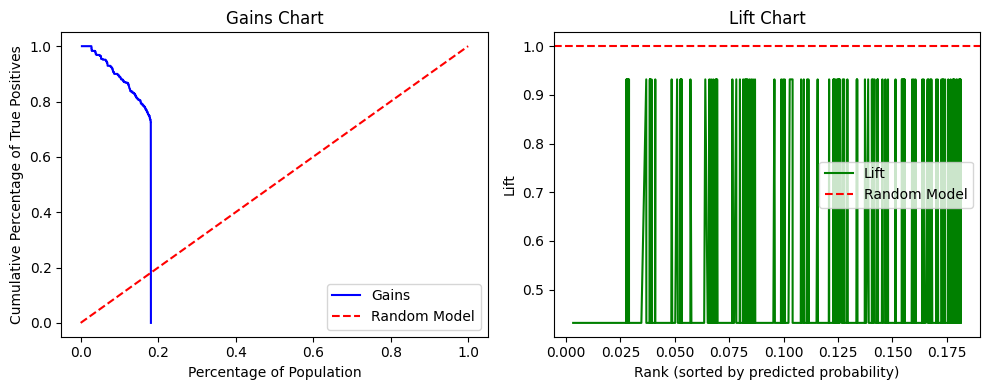

In [13]:
from sklearn.neural_network import MLPClassifier

# Train a neural network with 1 hidden node
airline_nnet_1 = MLPClassifier(hidden_layer_sizes=(1), activation='logistic', solver='lbfgs', max_iter=500, random_state=1)
airline_nnet_1.fit(X_train, y_train.ravel())  # Train with the same training data

print('Training data (1 hidden node)')
y_actual_train_1 = scaleOutput.inverse_transform(y_train).ravel()
y_pred_train_1 = scaleOutput.inverse_transform(airline_nnet_1.predict(X_train).reshape(-1, 1)).ravel()  # Fixed prediction part
classificationSummary(y_actual_train_1, y_pred_train_1)

print('\nValidation data (1 hidden node)')
y_actual_valid_1 = scaleOutput.inverse_transform(y_valid).ravel()
y_pred_valid_1 = scaleOutput.inverse_transform(airline_nnet_1.predict(X_valid).reshape(-1, 1)).ravel()  # Fixed prediction part
classificationSummary(y_actual_valid_1, y_pred_valid_1)

nnet_proba_1 = airline_nnet_1.predict_proba(X_train)
result_1 = pd.DataFrame({
    'actual': y_train.ravel(),
    'p(0)': [p[0] for p in nnet_proba_1],
    'p(1)': [p[1] for p in nnet_proba_1],
})
df_sorted_1 = result_1.sort_values(by=['p(1)'], ascending=False)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))


axes[0].plot(df_sorted_1['p(1)'], df_sorted_1['actual'].cumsum() / df_sorted_1['actual'].sum(), label='Gains', color='b')
axes[0].plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Model')
axes[0].set_xlabel('Percentage of Population')
axes[0].set_ylabel('Cumulative Percentage of True Positives')
axes[0].set_title('Gains Chart')
axes[0].legend()


axes[1].plot(df_sorted_1['p(1)'], df_sorted_1['actual'].rank() / len(df_sorted_1), label='Lift', color='g')
axes[1].axhline(1, color='r', linestyle='--', label='Random Model')
axes[1].set_xlabel('Rank (sorted by predicted probability)')
axes[1].set_ylabel('Lift')
axes[1].set_title('Lift Chart')
axes[1].legend()

plt.tight_layout()
plt.show()


#### In terms of comparing these two complexity levels, the 5-node model is likely better to perform well but is possibly overfitting the data, whereas, with the 1-node model, it may be more underfit but exercises generalization better.

---
##**Question 11.4 (d):**

#### The neural network model does not explicitly provide the effect or importance of individual variables (predictors) on the outcome variable 'Phone_sale'. Since these neural networks are considered "black-box" models, unlike decision trees or linear regression, they do not give much insight into the aspects of each / any of the features involved.